2.0


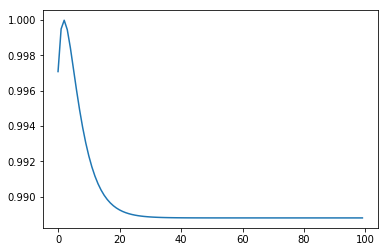

In [63]:


# Array manipulation
from numpy import append, asarray, empty, ones, tile

from numbers import Number

# Mathematical
from numpy import abs, angle, imag, real
from numpy import cos, dot, exp, mean, mod, pi, sin, sum
from numpy.random import normal, uniform

# Plotting
import matplotlib.pyplot as pyplot

class Kuramoto:
    def __init__(self, size, coupling, stepsize, phases=None, nat_frequencies=None, stepcount=0):
        self.size = size

        if isinstance(coupling, Number): # Uniform coupling
            self.coupling = ones(size)*coupling
        else:
            self.coupling = asarray(coupling)

        if self.coupling.size != size:
            raise ValueError("Not enough coupling strengths for every oscillator in the network.")

        if phases is None:
            self.phases = uniform(0, 2*pi, size)
        else:
            self.phases = asarray(phases)

        if self.phases.size != size:
            raise ValueError("Not enough initial phases for every oscillator in the network.")

        if nat_frequencies is None:
            self.nat_frequencies = normal(0 , 1, size)
        else:
            self.nat_frequencies = asarray(nat_frequencies)

        if asarray(nat_frequencies).size == size:
            raise ValueError("Not enough natural frequencies for every oscillator in the network.")

        self.stepsize = stepsize
        self.stepcount = stepcount

    def make_step(self, update=True):
# First order explicit forward Euler for now
        tiled = tile(self.phases, (self.size, 1))
        #k1 = self.coupling * sum(sin(self.phases - tiled.T), axis=1)
        k1 = dot(sin(self.phases - tiled.T), self.coupling)
        if update:
            self.phases += self.stepsize * (self.nat_frequencies + k1)

# The modulo operation is strictly speaking not necessary; remove for a speedup.
            self.phases = mod(self.phases, 2*pi)
            self.stepcount += 1
        else:
            return k1

    def make_step_loop(self, update=True):
# First order explicit forward Euler using explicit, slow loops
        k1 = empty(self.size)
        for i in range(0, self.size):
            #k1[i] = self.coupling * sum(sin(self.phases - self.phases[i]))
            k1[i] = dot(sin(self.phases - self.phases[i]), self.coupling)

        if update:
            self.phases += self.stepsize * (self.nat_frequencies + k1)

# The modulo operation is strictly speaking not necessary; remove for a speedup.
            self.phases = mod(self.phases, 2*pi)
            self.stepcount += 1
        else:
            return k1

    def order_parameters(self):
        o = mean(exp(self.phases * complex(0,1)))
        return abs(o), angle(o)

    def rectangular(self):
        p = exp(self.phases * complex(0,1))
        return real(p), imag(p)

def run(model, steps):
    order_parameters = empty((2,steps))
    for i in range(steps):
        model.make_step_loop()
        order_parameters[:,i] = model.order_parameters()
    return order_parameters


steps = 100

N = 2
#J = 0.5
J = 4
dt = 0.05
print(J/N)
tmp = J / N
model = Kuramoto(N, tmp, dt)

order_parameters = run(model, steps)
pyplot.plot(range(steps), order_parameters[0,:])
# pyplot.plot(range(steps), order_parameters[1,:])
pyplot.show()